# Image classification wth CNN pretrained on imagenet database

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras import backend as keras
from keras.layers import *
from keras.models import Model

from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions

#from keras.preprocessing import image
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


from keras import backend as K

#from CNN_utils import *

In [7]:
#!wget 'https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/CNN_utils.py' -O CNN_utils.py

!wget 'https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/cat.1.jpg' -O cat.1.jpg
!wget 'https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/cat.0000.jpg' -O cat.0000.jpg
!wget 'https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/cat.00000.jpg' -O cat.00000.jpg
!wget 'https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/dog.1018.jpg' -O dog.1018.jpg


--2023-01-17 17:34:56--  https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/CNN_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3817 (3.7K) [text/plain]
Saving to: ‘CNN_utils.py’

CNN_utils.py        100%[===================>]   3.73K  --.-KB/s    in 0s      

2023-01-17 17:34:56 (28.7 MB/s) - ‘CNN_utils.py’ saved [3817/3817]

--2023-01-17 17:34:56--  https://raw.githubusercontent.com/knave88/pretrainedCNN_DEMO/main/cat.1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16880 (16K) [image/jpeg]
Saving to

In [3]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

## Load pretrained CNN
We'll use Moblilenet as it is one of the lightweight models. Depthwise Separable Convolution is used to reduce the model size and complexity.
We load a MobileNet model, with weights pre-trained on ImageNet. The default input size for this model is 224x224. The network outputs the probability for 1000 classes.

In [4]:
base_model = MobileNet(include_top=True, weights='imagenet') #classes=1000
#base_model.summary()
print("Total parameters: "+str(base_model.count_params())+" in "+str(len(base_model.layers))+" layers" )

17225924/17225924 [==============================] - 0s 0us/step
Total parameters: 4253864 in 91 layers


<img src="https://github.com/knave88/pretrainedCNN_DEMO/blob/main/mobilenet.png?raw=1">

In [5]:
# mark the convolution layer for feature extraction
layer_index = 'conv_pw_13'
model = Model(inputs=base_model.input, outputs=(base_model.get_layer(layer_index).output,base_model.layers[-1].output))

## Load cat image

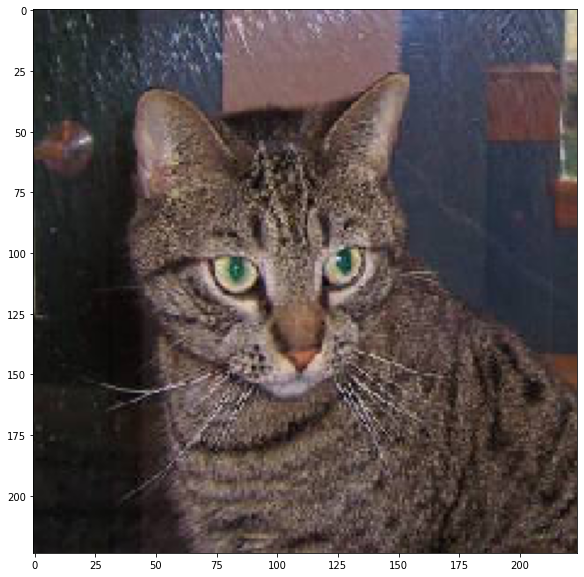

In [8]:
img_path = 'cat.1.jpg'
img = load_img(img_path, target_size=(224, 224))

plt.figure()
plt.imshow(img)

## Inference
We set the image above as input to the network and get predictions from the output layer of the network.

In [9]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

conv_out, preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
decode_preds = decode_predictions(preds, top=13)
print('Top 3 predictions:', decode_preds[0][0][1], decode_preds[0][1][1], decode_preds[0][2][1])


35363/35363 [==============================] - 0s 0us/step
Top 3 predictions: tabby Egyptian_cat tiger_cat


## Load dog image

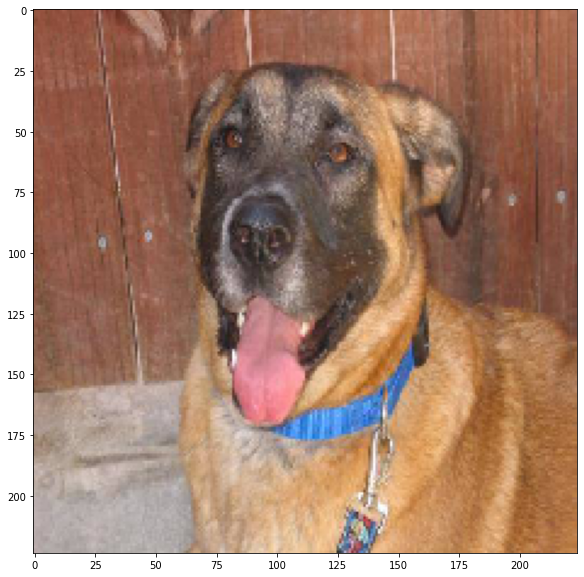

In [10]:
img_path = 'dog.1018.jpg'
img = load_img(img_path, target_size=(224, 224))

plt.figure()
plt.imshow(img)

## Inference
We set the image above as input to the network and get predictions from the output layer of the network.

In [11]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

conv_out, preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
decode_preds = decode_predictions(preds, top=13)
print('Top 3 predictions:', decode_preds[0][0][1], decode_preds[0][1][1], decode_preds[0][2][1])


1/1 [==============================] - 0s 81ms/step
Top 3 predictions: malinois bull_mastiff Irish_terrier


## More sophisticated example

First, we'll begin with simple enough image of a cat.

1/1 [==============================] - 0s 71ms/step
Top prediction: Siamese_cat


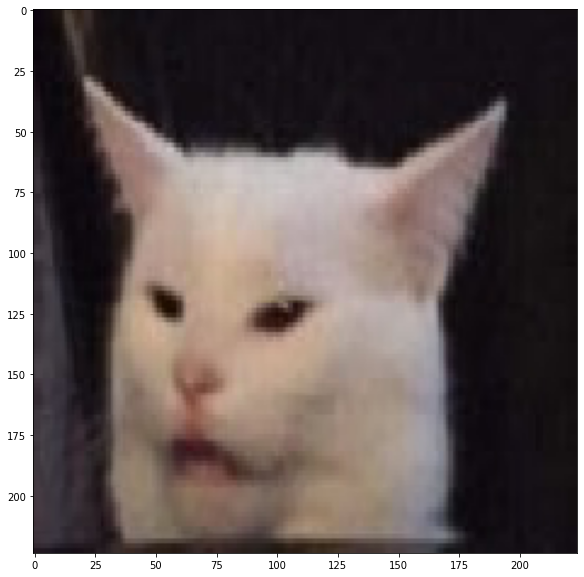

In [12]:
img_path = 'cat.0000.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
conv_out, preds = model.predict(x)
decode_preds = decode_predictions(preds, top=13)

plt.figure()
plt.imshow(img)
print('Top prediction: '+str(decode_preds[0][0][1]));

But what if the animal was not the only object present in the image?

1/1 [==============================] - 0s 68ms/step
Top 3 predictions: hamper wok apron


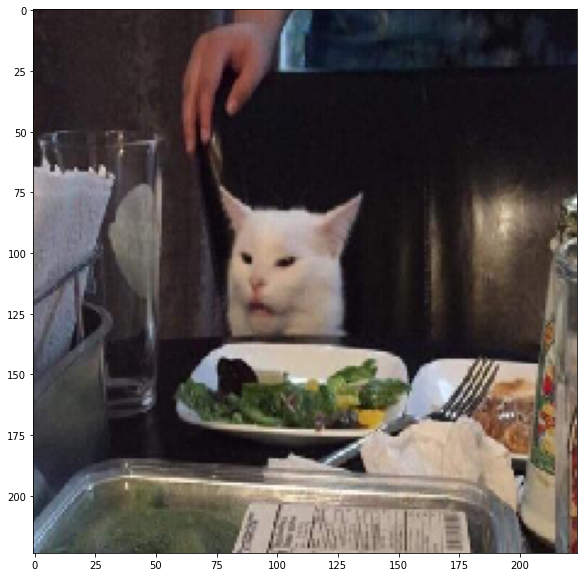

In [13]:
img_path = 'cat.00000.jpg'
img = load_img(img_path, target_size=(224, 224))

plt.figure()
plt.imshow(img)

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

conv_out, preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
decode_preds = decode_predictions(preds, top=13)
print('Top 3 predictions:', decode_preds[0][0][1], decode_preds[0][1][1], decode_preds[0][2][1])

As the cat is not in the top 3, let's see further down the list of top predictions.

In [14]:
decode_preds[0]

[('n03482405', 'hamper', 0.4813758),
 ('n04596742', 'wok', 0.093231164),
 ('n02730930', 'apron', 0.08441092),
 ('n07831146', 'carbonara', 0.03996895),
 ('n07590611', 'hot_pot', 0.023241535),
 ('n04081281', 'restaurant', 0.017247617),
 ('n03180011', 'desktop_computer', 0.015417245),
 ('n02124075', 'Egyptian_cat', 0.014584704),
 ('n04542943', 'waffle_iron', 0.013360537),
 ('n03133878', 'Crock_Pot', 0.012080304),
 ('n03782006', 'monitor', 0.010762791),
 ('n04560804', 'water_jug', 0.008342544),
 ('n03633091', 'ladle', 0.0077299275)]

There it is: No 8 'Egyptian_cat' class with probability of 0.014584725.

Since this network has 1000 classes it focuses on other objects present in the image.

# Weakly supervised object localisation

Weakly-supervised learning provides a way to omit difficult process of pixel-level annotation of data. Models trained through WSL exploit unlabeled inputs, as well as coarse or ambiguous labels.

The goal of such approach is to classify images with only global image-level labels, while producing pixel-level label predictions, thereby localizing the important regions of interest that are linked to the model's global decision. Pinpointing image sub-regions that were used by the model to make its global image-class prediction not only provides weakly supervised segmentation, but also enables interpretable deep-network classifiers.

## Heat map for top predictions
Let's take a look at the feature map from last convoluton layer to see the area on which the prediction was made.

In [32]:
def get_bounds(out, percentile=95):
    # Get bounding box of 95+ percentile pixels
    a = out.flatten()
    filtered = np.array([1 if x > np.percentile(a, percentile) else 0 for x in a]).reshape(224,224)
    left, up, down, right = 224, 224, 0, 0
    for x in range(224):
        for y in range(224):
            if filtered[y,x] == 1:
                left = min(left, x)
                right = max(right, x)
                up = min(up, y)
                down = max(down, y)
    return left, up, down, right

def heatmap_for_top_pred(img2infer, model_CAM,  pred_index=None, figsizeX=12, analysed_preds=7):
    img = load_img(img2infer, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = model_CAM(x)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
        
    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    heatmap = cv2.resize(heatmap.numpy(), (224,224))
    heatmap = np.uint8(255 * heatmap)

    left, up, down, right = get_bounds(heatmap, percentile=95)

    rect = patches.Rectangle((left, up), (right-left), (down-up), linewidth=1,  edgecolor='r', facecolor='none')

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(figsizeX, figsizeX))
    axes.imshow(img, alpha=0.7)
    axes.imshow(heatmap, cmap='jet', alpha=0.3)
    left, up, down, right = get_bounds(heatmap, percentile=95)
    rect = patches.Rectangle((left, up), (right-left), (down-up), linewidth=1,  edgecolor='r', facecolor='none')
    axes.add_patch(rect)
    axes.set_title('Heat map and bounding box for prediction: '+str(decode_preds[0][analysed_preds][1]))
    return None

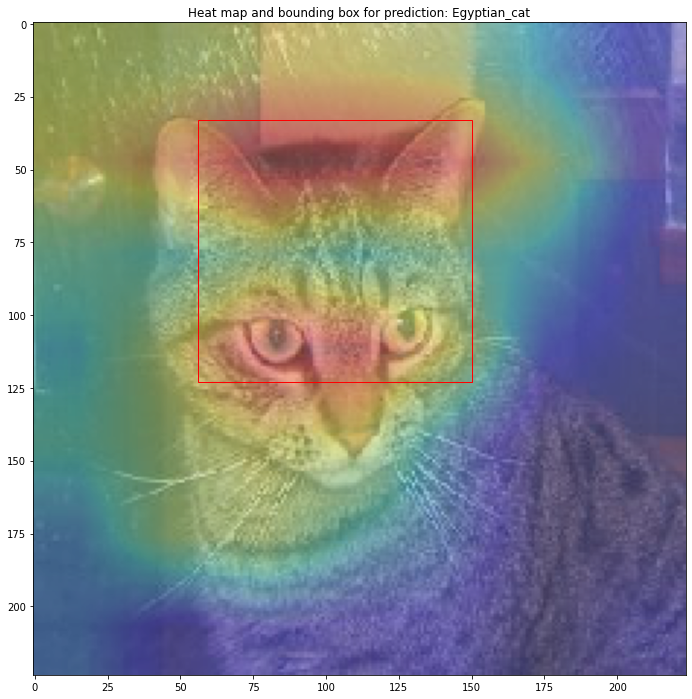

In [33]:
heatmap_for_top_pred ('cat.1.jpg', model) #extract_layer_name='conv_pw_13'

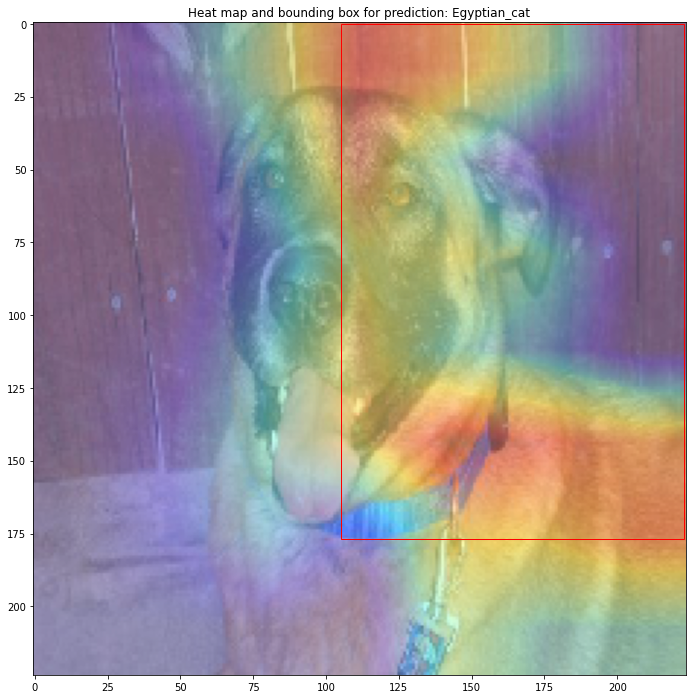

In [34]:
heatmap_for_top_pred ('dog.1018.jpg', model)

Here we can see based on which part of image the predictions were made.
As you can see we can even perfrom coarse localisation based on the feature representation for predictions.

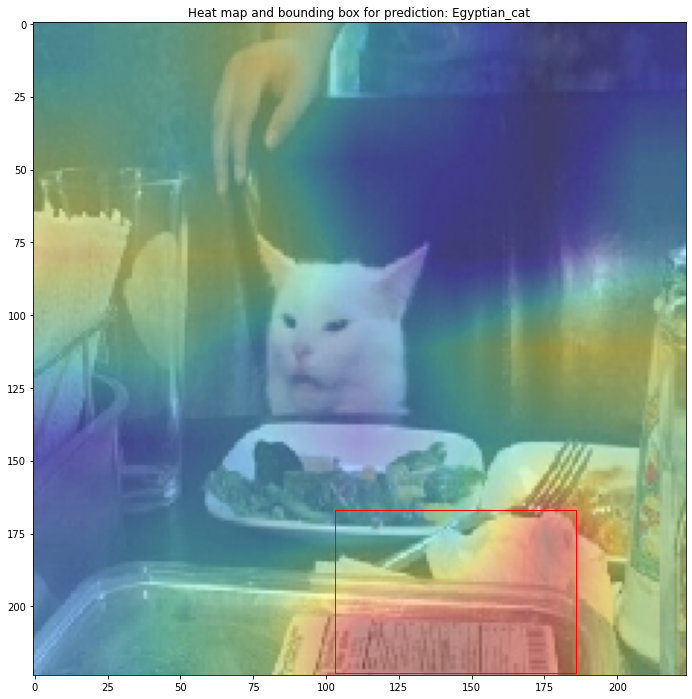

In [35]:
heatmap_for_top_pred ('cat.00000.jpg', model)

Here the top prediction is not what we're looking for so let's have a look at the feature map for specific class predictions.

#### Select the class you want to show
As you can see the top prediction is not a cat so let's take a look inside and select the cat class.

In [36]:
analysed_preds = 7
decode_preds[0][analysed_preds][1]

'Egyptian_cat'

#### Generate a heat map from specific layer

First, inspect the model to look for the layer names:

In [ ]:
model.summary()

In [38]:
#todo
extract_layer_name = 'conv_pw_13'  #'conv_pw_2' # 'conv_pw_4' #'conv_pw_12'  #'conv_pw_13'

In [45]:
img2infer = 'cat.00000.jpg'
img = load_img(img2infer, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

with tf.GradientTape() as tape:
    last_conv_layer_output, preds = model_CAM(x)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]
    
grads = tape.gradient(class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

print('Heatmap calculated')


Heatmap calculated


#### Plot heatmap

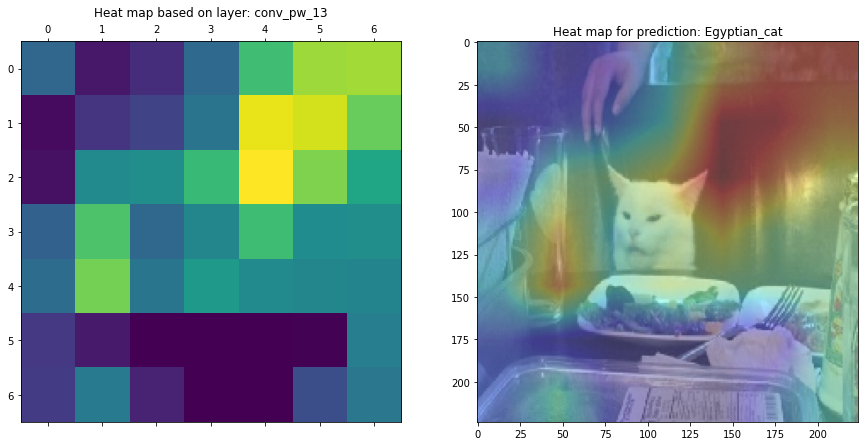

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axes[0].matshow(heatmap)
axes[0].set_title('Heat map based on layer: '+extract_layer_name)


axes[1].imshow(img, alpha=0.7)

heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
axes[1].imshow(heatmap, cmap='jet', alpha=0.3)

axes[1].set_title('Heat map for prediction: '+str(decode_preds[0][analysed_preds][1]));


#### Plot bounding box

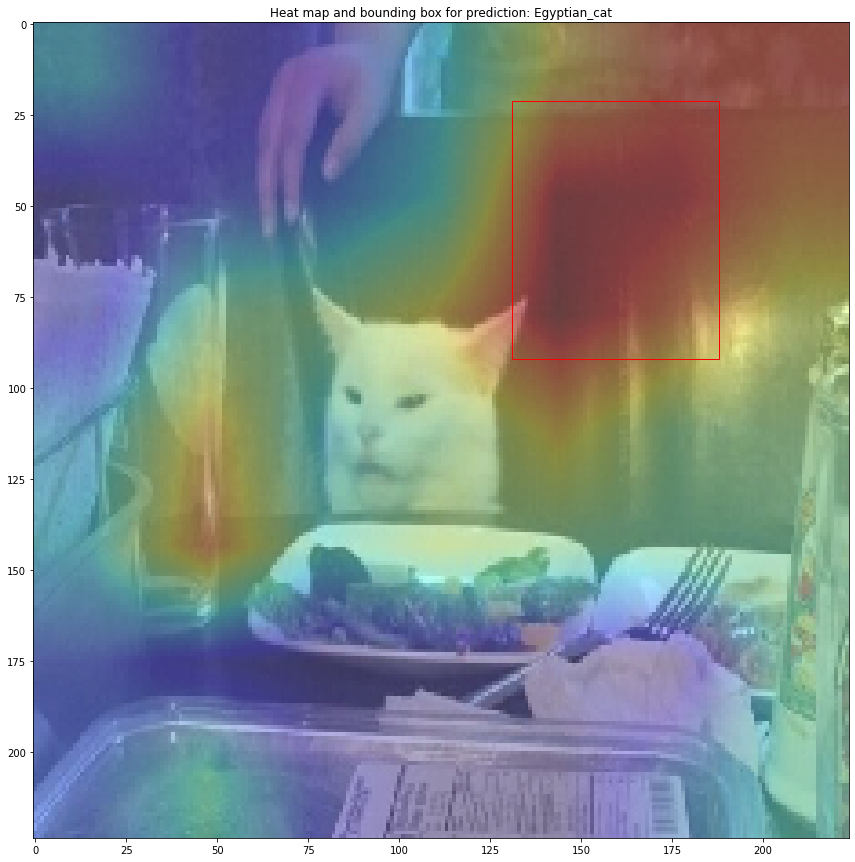

In [47]:
# Plot Heatmap
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
axes.imshow(img, alpha=0.7)

axes.imshow(heatmap, cmap='jet', alpha=0.3)

left, up, down, right = get_bounds(heatmap, percentile=95)

rect = patches.Rectangle((left, up), (right-left), (down-up), linewidth=1,  edgecolor='r', facecolor='none')

axes.add_patch(rect)
axes.set_title('Heat map and bounding box for prediction: '+str(decode_preds[0][analysed_preds][1]));
#plt.show()

## Summary
Pretrained networks are a good way to start your project as they are usually trained on large amounts of data and using resources that aren’t usually available to everyone. Based on the feature maps inside CNN you can see the focus (attention) of the network as well as perform coarse localisation.

## TL;DR
Network trained for classification + Class Activation Maps (CAMs) -> Weakly Supervised Object Localisation (WSOL)